# Decision Tree Worksheet

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

## YOUR CODE HERE

data = pd.read_csv(url, names=names)

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=15, min_samples_leaf=1)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

# Training/fitting the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE

y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  99.59266802443992
Validation Accuracy is  63.41463414634146


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE

decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=8, min_samples_leaf=10)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE

y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  84.31771894093686
Validation Accuracy is  71.54471544715447


Explain the accuracy results below. 

As depth is increased and leafs are decreased, the data set is being overfitted which leads to higher training accuracy but lower validation accuracy.

## Metrics

Plot the ROC curve and print the AUC of the second model.

<class 'pandas.core.series.Series'>
AUC: 0.6852060982495765


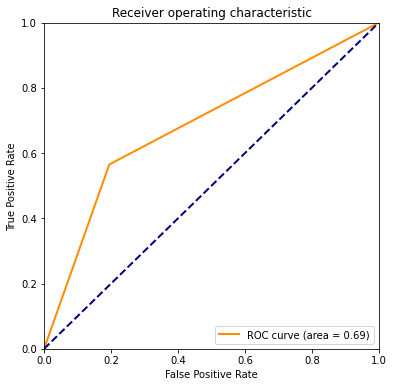

In [ ]:
## YOUR CODE HERE
# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
print(type(y_val))
fpr, tpr, thresholds = metrics.roc_curve(y_val, np.array(y_val_pred))
# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Use graphviz to visualize your 2nd tree.

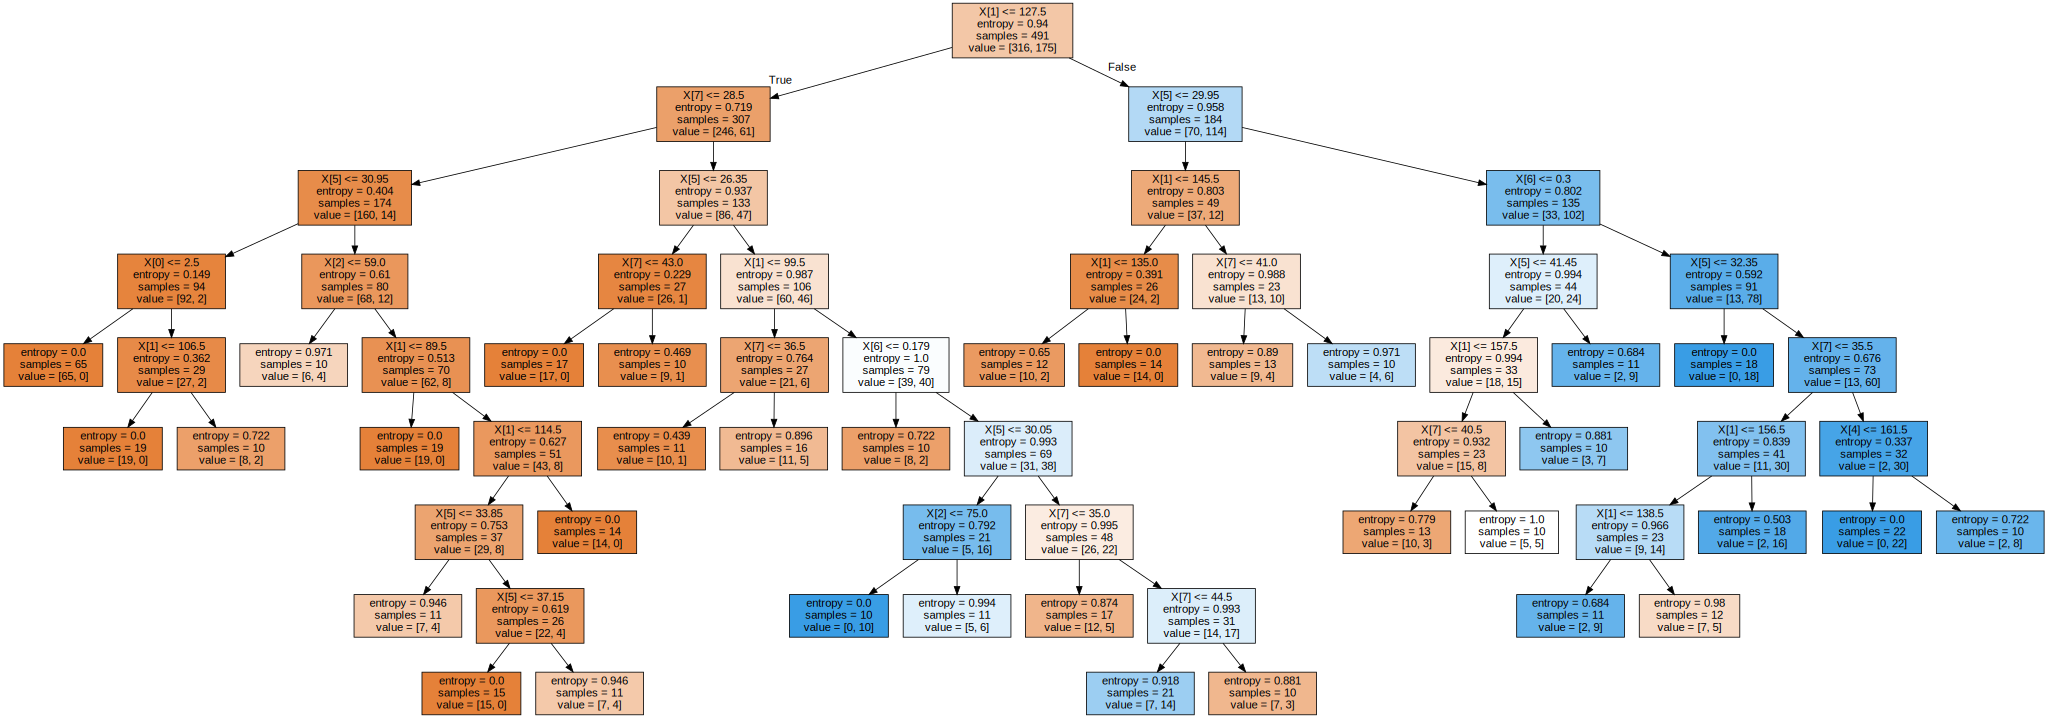

In [ ]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

Different parameters for each input

Question 2: What is the root feature? Does it make sense as the root feature?

X[1] <= 127.5; Yes it would make sense because it divided it up into a roughly 3:1.8 sample ratio. Later, we found it has the highest importance too.

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

The training accuracy would be high because the graph is highly overfitting the data. The test accuracy would go down because the model wouldn't be able to generalize to a broader pattern

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
decision_tree_2 = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)  # minimum sample leafs is the minimum sample 
                                                                # amount the leaf can have

decision_tree_2.fit(X_train, y_train)

y_train_pred=decision_tree_2.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree_2.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  68.29268292682927


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE

y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  76.42276422764228


How did the accuracy compare to the decision tree's accuracy?

The accuracy was higher in both aspects; although the model overfitted the training data, due to the larger number of "trees" classifying the data, the validation accuracy was also higher.

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE
importances = random_forest.feature_importances_
forest_importances = pd.Series(importances, index=X_cols)
print(forest_importances.sort_values(ascending=False)[:3])

plas    0.237887
mass    0.187690
age     0.144345
dtype: float64


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

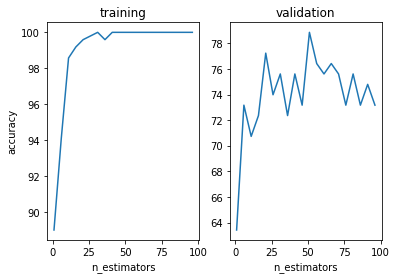

In [ ]:
y_train_acc = []
y_val_acc= []
for n in range(1,100,5):
    random_forest = RandomForestClassifier(n_estimators=n)
    random_forest.fit(X_train, y_train)
    y_train_pred=random_forest.predict(X_train)
    y_val_pred=random_forest.predict(X_val)
    y_val_acc.append(accuracy_score(y_val,y_val_pred)*100)
    y_train_acc.append(accuracy_score(y_train, y_train_pred)*100)
plt.subplot(1,2,1)
plt.title("training")
x = np.arange(1,100, 5)
plt.plot(x,y_train_acc)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.subplot(1,2,2)
plt.title("validation")
plt.xlabel("n_estimators")
plt.plot(x,y_val_acc)
plt.show()

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

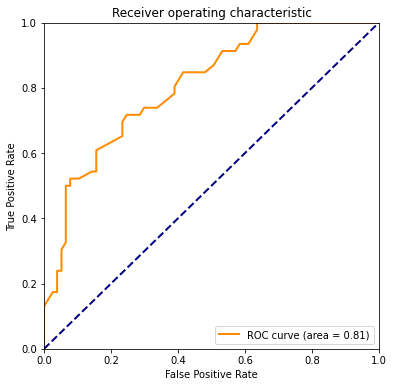

In [ ]:
## YOUR CODE HERE
probs = random_forest.predict_proba(X_val)
probs = probs[:,1]

probsAcc = metrics.roc_auc_score(y_val, probs)

fpr, tpr, threshold = metrics.roc_curve(y_val, probs)
# print("AUC:", roc_auc)
# print("FPR:", fpr)
# print("TPR:", tpr)
# Plot the ROC curve
# plt.plot(fpr, tpr)
# plt.subplot(1,2,1)
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % probsAcc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d04d55b4-7bac-4c1b-8ecc-497188aeb017' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>